In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('/kaggle/input/hotel-reviews-dataset/Hotel Reviews.csv')

In [3]:
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [4]:
data.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.61126,...,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.72939,...,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Accommodation & Food Services,Coeur d'Alene,US,us/id/coeurd'alene/702wapplewayave/210547670,47.69993,...,2017-12-17T00:00:00Z,4.0,https://www.tripadvisor.com/Hotel_Review-g3541...,Rolled in 11:30 laid out heads down woke up to...,Passing through,Montana,UnitedStates,Amber406,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Accommodation & Food Services,Jackson,US,us/tn/jackson/2295nhighlandave/1759289930,35.66639,...,2016-07-16T00:00:00Z,1.0,https://www.tripadvisor.com/Hotel_Review-g5512...,Absolutely terrible..I was told I was being gi...,Terrible,woodbury,NaN,donWoodbury,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...
9999,AVwddMfdIN2L1WUfwAue,2016-06-22T19:07:21Z,2018-01-01T00:00:43Z,3811 Minnesota Dr,"Hotel,Motels,Lodging,Hotels,Hotels and Motels",Accommodation & Food Services,Anchorage,US,us/ak/anchorage/3811minnesotadr/806029870,61.18531,...,2017-12-17T00:00:00Z,1.0,https://www.tripadvisor.com/Hotel_Review-g6088...,"Filthy, outdated, noisy neighbours, but this w...",Polde,Sempeter pri Gorici,Slovenia,janezr2013,https://www.tripadvisor.com/Hotel_Review-g6088...,http://royalsuitealaska.com


In [6]:
data.describe()

,latitude,longitude,reviews.rating
count,10000.000000,10000.000000,10000.000000
mean,37.003630,-92.675934,4.034265
std,5.517273,19.347989,1.162240
min,19.438604,-159.474930,1.000000
25%,33.927588,-111.622343,3.350000
50%,37.785060,-84.452114,4.000000
75%,40.416380,-77.052700,5.000000
max,70.133620,-68.203990,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

In [12]:
data["reviews.text"].value_counts()

reviews.text
Great                                                                                                                                                                                                                                                                                                                                                                                                                                                          6
good                                                                                                                                                                                                                                                                                                                                                                                                                                                           3
Bad: The cleanliness wasn't the best. One of our towels and bed sheets had red stains on 

In [9]:
data["reviews.title"].value_counts()

reviews.title
Great stay                                35
Great Stay                                33
Great location                            32
Great Hotel                               31
Nice hotel                                30
                                          ..
Best place to stay in New Philadelphia     1
Great staff.. updated rooms.               1
Thumbs up hotel and location               1
Convenient stop off I-4                    1
Polde                                      1
Name: count, Length: 8622, dtype: int64

In [10]:
data["reviews.userCity"].value_counts()

reviews.userCity
New York City          54
Chicago                45
Houston                43
Atlanta                36
Los Angeles            33
                       ..
Wylie  St Paul          1
Ridgewood               1
Venice                  1
Moravian Falls          1
Sempeter pri Gorici     1
Name: count, Length: 2051, dtype: int64

In [11]:
data["reviews.userProvince"].value_counts()

reviews.userProvince
CA           165
FL           156
TX           143
NY           116
PA            87
            ... 
Singapore      1
Karnataka      1
BC             1
Slovakia       1
Slovenia       1
Name: count, Length: 177, dtype: int64

# Handle NULL Data

In [13]:
data["reviews.title"].fillna(value="Great stay", inplace=True)
data["reviews.userCity"].fillna(value="New York City", inplace=True)
data["reviews.userProvince"].fillna(value="CA", inplace=True)
data["reviews.text"].fillna(value="Great", inplace=True)

/tmp/ipykernel_573/536828997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["reviews.title"].fillna(value="Great stay", inplace=True)
/tmp/ipykernel_573/536828997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

# Extract review texts and ratings


In [14]:
texts = data['reviews.text'].astype(str)
ratings = data['reviews.rating']

# Preprocess ratings into sentiment categories (positive, negative, neutral)
# Assuming ratings above 3 are positive, 3 is neutral, below 3 is negative

In [15]:
labels = ratings.apply(lambda x: 'positive' if x > 3 else ('neutral' if x == 3 else 'negative'))


# Tokenization and padding

In [16]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [17]:
padded_sequences = pad_sequences(sequences, maxlen=100)

# Encode labels to numerical values

In [18]:
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

# Split the data into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 100), (2000, 100), (8000,), (2000,))

# RNN model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes: positive, neutral, negative
])

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.7548 - loss: 0.7319 - val_accuracy: 0.8000 - val_loss: 0.5324
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8214 - loss: 0.4544 - val_accuracy: 0.8105 - val_loss: 0.4802


# plot accuracy and loss

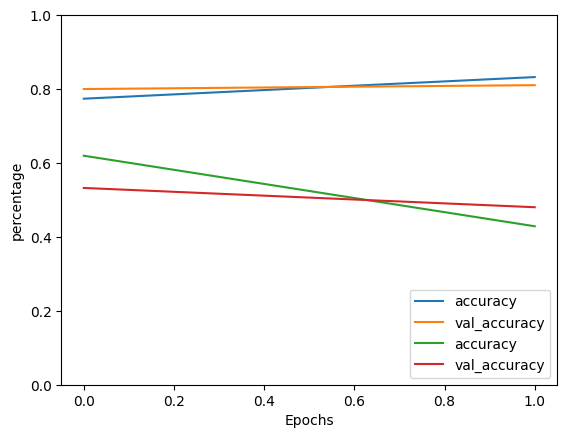

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.ylim([0, 1])


plt.plot(history.history['loss'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('percentage')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()